In [19]:
# Importamos la librería pandas
import pandas as pd
#importamos la librería para gratificar las variables
import matplotlib.pyplot as plt

# Definimos la ruta de los datos
ruta_test = './datos/test.csv'
ruta_train = './datos/train.csv'

# Cargamos los datos
test = pd.read_csv(ruta_test)
train = pd.read_csv(ruta_train)

# Mostramos los datos

print('Datos de test:')
print(test.head())
print('Datos de train:')
print(train.head())

# Mostramos las dimensiones de los datos
print('Dimensiones de test:', test.shape)
print('Dimensiones de train:', train.shape)



Datos de test:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ..

col_0               count
Activity                 
LAYING               1407
SITTING              1286
STANDING             1374
WALKING              1226
WALKING_DOWNSTAIRS    986
WALKING_UPSTAIRS     1073
Columnas de test: Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


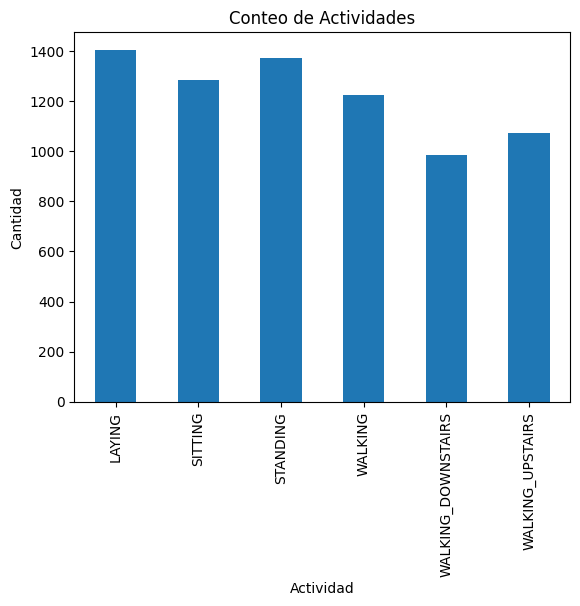

In [20]:
# Contar la cantidad de registros en cada actividad
conteo_actividades = pd.crosstab(index=train['Activity'], columns="count")

# Mostrar el conteo de actividades
print(conteo_actividades)

#mostrar las columnas de los datos
print('Columnas de test:', test.columns)

# Gratificar el conteo de actividades
conteo_actividades.plot(kind='bar', legend=False)

plt.title('Conteo de Actividades')
plt.xlabel('Actividad')
plt.ylabel('Cantidad')
plt.show()

El gráfico de barras muestra la distribución de seis actividades diferentes: LAYING, SITTING, STANDING, WALKING, WALKING_DOWNSTAIRS y WALKING_UPSTAIRS, junto con sus respectivos recuentos. Aquí está el análisis:

LAYING: Con 1407 instancias, es la actividad más frecuente en el conjunto de datos.
SITTING: Le sigue de cerca con 1286 instancias.
STANDING: También es común, con 1374 instancias.
WALKING: Aunque aún es significativo, tiene 1226 instancias.
WALKING_DOWNSTAIRS: Tiene un número menor de instancias, con 986.
WALKING_UPSTAIRS: Es la menos común, con 1073 instancias.
En general, las actividades de reposo (LAYING, SITTING y STANDING) son más frecuentes que las actividades de movimiento (WALKING y escaleras). Este desequilibrio podría afectar el rendimiento de un modelo de aprendizaje automático, especialmente si se busca predecir actividades menos comunes.

In [21]:
# Definir X_train y X_test

X_test = test.drop('Activity', axis=1)
Y_test = test['Activity']

X_train = train.drop('Activity', axis=1)
Y_train = train['Activity']




In [22]:
from sklearn.preprocessing import StandardScaler

# Crear el estandarizador
scaler = StandardScaler()

# Ajustar el estandarizador con los datos de entrenamiento y transformarlos
X_train_stand = scaler.fit_transform(X_train)

# Transformar los datos de prueba con el estandarizador ajustado con los datos de entrenamiento
X_test_stand = scaler.transform(X_test)

In [23]:
from sklearn import preprocessing

# Crear el codificador
encoder = preprocessing.LabelEncoder()

# Ajustar el codificador a las etiquetas de entrenamiento y prueba
encoder.fit(pd.concat([Y_train, Y_test]))

# Transformar las etiquetas de entrenamiento y prueba
Y_train_encoded = encoder.transform(Y_train)
Y_test_encoded = encoder.transform(Y_test)

# Imprimir los resultados
print("Y_train_encoded: ", Y_train_encoded)
print("Y_test_encoded: ", Y_test_encoded)

Y_train_encoded:  [2 2 2 ... 5 5 5]
Y_test_encoded:  [2 2 2 ... 5 5 5]


In [24]:
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [10, 15]
}

# Imprimir el diccionario
print(param_grid)

{'kernel': ['linear', 'rbf'], 'C': [10, 15]}


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=10)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, Y_train_encoded)

# Obtener la mejor combinación de parámetros
best_params = grid_search.best_params_

# Obtener el modelo con la mejor combinación de parámetros
best_model = grid_search.best_estimator_

# Predecir las etiquetas para el conjunto de prueba
Y_test_pred = best_model.predict(X_test)

# Calcular la precisión de las predicciones
accuracy = best_model.score(X_test, Y_test_encoded)

# Imprimir la precisión
print("Precisión del modelo en el conjunto de prueba: ", accuracy)


Precisión del modelo en el conjunto de prueba:  0.9596199524940617
